# MNIST
The objective of this project is to use different algorithms from Sklearn and Tensorflow to identify hand-written digits, training our models using the MNIST dataset.

## 1. Read Data

In [33]:
'''
First, we need to download the mnist dataset from sklearn db
'''
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', return_X_y=True)

## 2. Data Preprocessing

In [34]:
'''
Because tf works with numpy ndarrays, we will convert the X data into numpy.
'''
X = X.to_numpy()

In [35]:
'''
We're gonna separate the data into a training set and a test set.
'''
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [36]:
'''
For regression, it is necessary to normalize the data before. Knowing that every image is on scale of greys, we can just divide every cell into 255, the maximum number that a byte can reach.
'''
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [20]:
'''
Tensorflow needs to recieve the dasaset as a matrix of 28x28, with a array of one value on it. This is possible using the reshape method.
'''
X_train_cnn = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_scaled.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)

In [18]:
'''
Also needs to recieve the target as a category.
'''
from keras.utils.np_utils import to_categorical
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

## 3. Model Creation
For this project, we will be comparing the next algorithms:

In [37]:
"""
Logistic Regression
extrated from https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
"""
from sklearn.linear_model import LogisticRegression
#Let's create a scaled model from our scaled dataset
log_reg = LogisticRegression(C=50.0 / 5000, penalty='l1', solver='saga', tol=0.1, max_iter=100)

In [11]:
"""
SVM
extracted from https://dmkothari.github.io/Machine-Learning-Projects/SVM_with_MNIST.html
"""
from sklearn.svm import SVC
svm = SVC()

In [12]:
'''
Random Forest
extracted from https://www.kaggle.com/ashwani07/mnist-classification-using-random-forest
'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [13]:
'''
Neural Network (MPL)
exctracted from https://dmkothari.github.io/Machine-Learning-Projects/MLP_with_MNIST.html
'''
from sklearn.neural_network import MLPClassifier
mpl = MLPClassifier()

In [22]:
'''
CNN
extracted from https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization

cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu')) #para interpretar matrices de 28x28
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) #para interpretar matrices de 28x28

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())
cnn.add(BatchNormalization())
cnn.add(Dense(512,activation='relu'))

cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer ='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

## 4. Adjust Model with Historic Data

In [38]:
#Logistic Regression
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1)

In [25]:
#SVM
svm.fit(X_train, y_train)

SVC()

In [26]:
#Random Forest
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
#MPL
mpl.fit(X_train, y_train)

MLPClassifier()

In [ ]:
#CNN
cnn.fit(x=X_train_cnn, y=y_train_cnn, epochs=10)

## 5. Prediction for new Data

In [39]:
#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)

In [ ]:
#SVM
svm_pred = svm.predict(X_test)

In [ ]:
#Random Forest
rd_pred = rf.predict(X_test)

In [ ]:
#MPL
mpl_pred = mpl.predict(X_test)

In [ ]:
#CNN
cnn_pred = cnn.predict(X_test_cnn)


## 6. Visualization of Results

In [41]:
'''For visualizing the results of every model, we will use confusion matrix'''
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

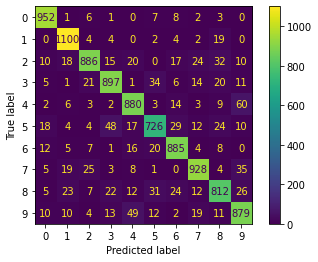

In [45]:
'''Logistic Regression'''
log_reg_conf = confusion_matrix(y_test, log_reg_pred)
log_reg_conf = ConfusionMatrixDisplay(log_reg_conf)
log_reg_conf.plot()